In [2]:
import numpy as np
import pandas as pd
import sys
import os
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sys.path.append('..')
from helper import *

setwd()

In [18]:
from scripts.model import get_datasets
X_train, y_train, X_test, y_test = get_datasets("sandbox_T_apartment_S_ca")
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

y_col = 'price'

In [22]:
numeric_description(df_train)

,mean,std,min,25%,50%,75%,max,missings,missing ratio (%)
cats_allowed,0.730964,0.443470,0.000000,0.000000,1.000000,1.000000,1.000000,0.0,0.0
dogs_allowed,0.698965,0.458720,0.000000,0.000000,1.000000,1.000000,1.000000,0.0,0.0
smoking_allowed,0.730119,0.443909,0.000000,0.000000,1.000000,1.000000,1.000000,0.0,0.0
wheelchair_access,0.100380,0.300514,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0
electric_vehicle_charge,0.050428,0.218832,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0
comes_furnished,0.026191,0.159706,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0
half_baths,0.049108,0.216098,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0
b_hospital_type_critical,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
b_hospital_type_longterm,0.528831,0.499181,0.000000,0.000000,1.000000,1.000000,1.000000,0.0,0.0
b_hospital_type_children,0.492660,0.499959,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.0


In [21]:
numeric_description(df_test)

,mean,std,min,25%,50%,75%,max,missings,missing ratio (%)
cats_allowed,0.729210,0.444395,0.000000,0.000000,1.000000,1.000000,1.000000,0.0,0.0
dogs_allowed,0.698534,0.458923,0.000000,0.000000,1.000000,1.000000,1.000000,0.0,0.0
smoking_allowed,0.732290,0.442793,0.000000,0.000000,1.000000,1.000000,1.000000,0.0,0.0
wheelchair_access,0.107552,0.309833,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0
electric_vehicle_charge,0.055562,0.229089,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0
comes_furnished,0.022668,0.148853,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0
half_baths,0.052236,0.222516,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0
b_hospital_type_critical,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
b_hospital_type_longterm,0.534311,0.498852,0.000000,0.000000,1.000000,1.000000,1.000000,0.0,0.0
b_hospital_type_children,0.494271,0.499998,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.0


In [23]:
description_categorical(df_train)

,,#Levels,"Max Freq (Abs,%)","Min Freq (Abs,%)",#Unknows,Unknows (%)


In [24]:
description_categorical(df_test)

,,#Levels,"Max Freq (Abs,%)","Min Freq (Abs,%)",#Unknows,Unknows (%)


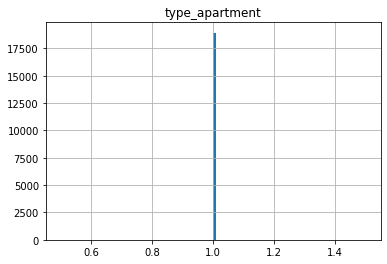

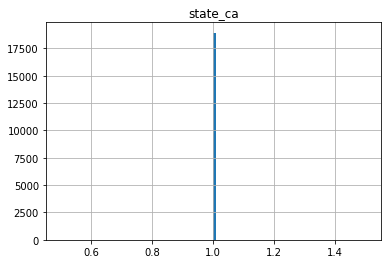

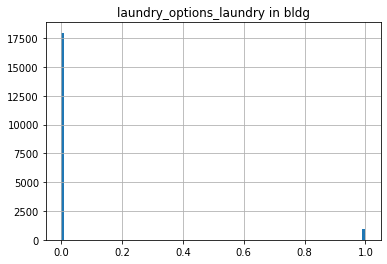

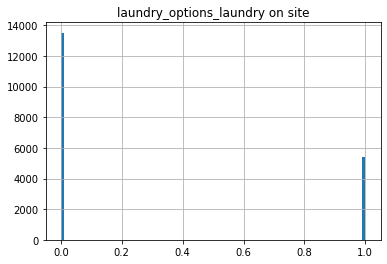

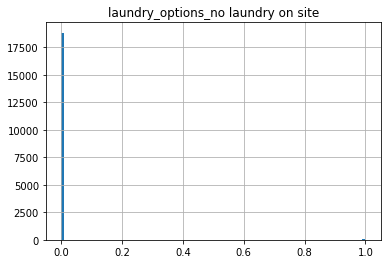

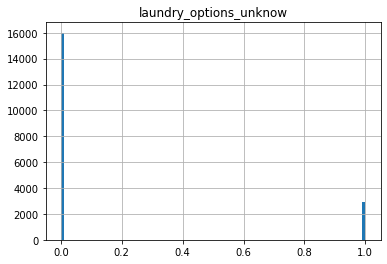

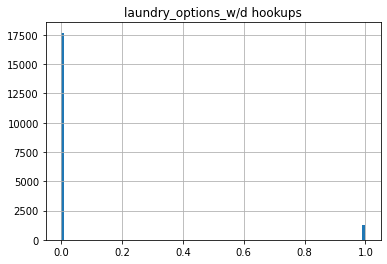

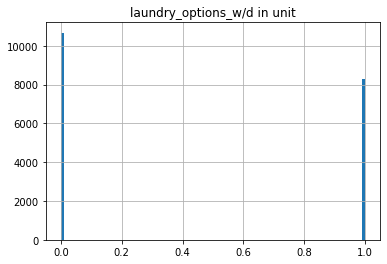

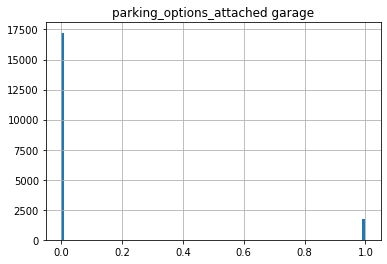

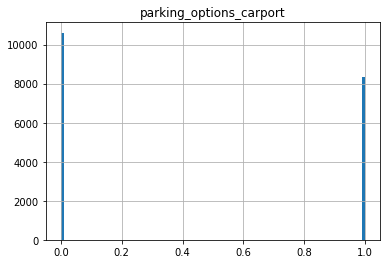

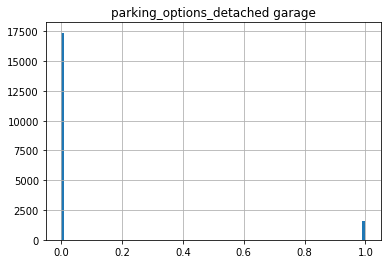

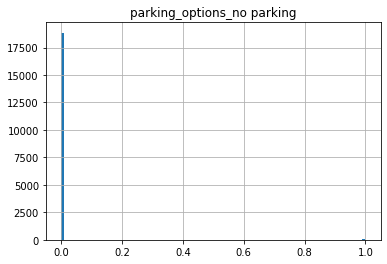

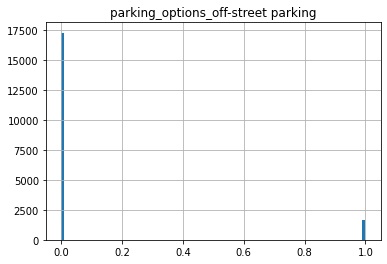

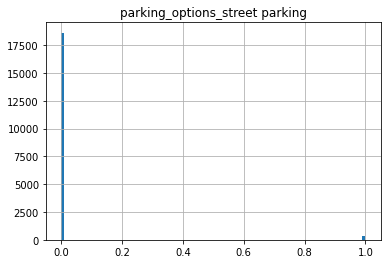

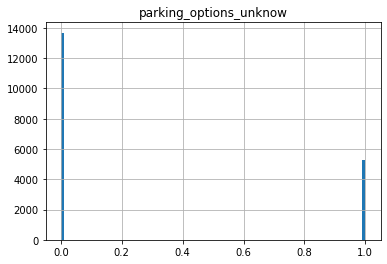

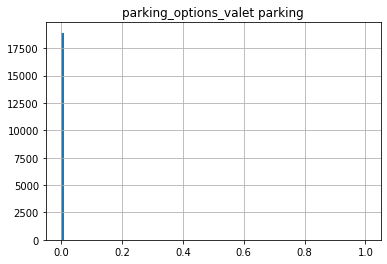

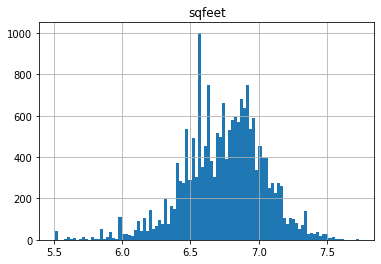

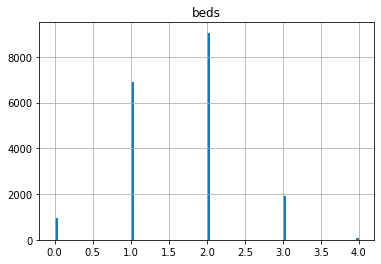

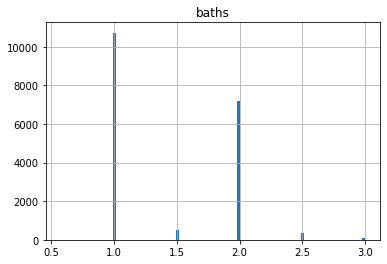

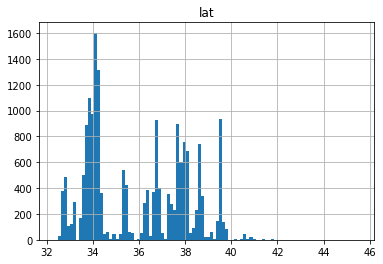

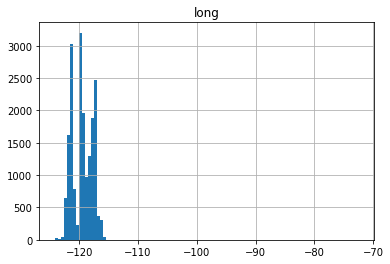

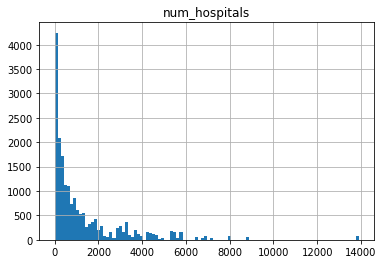

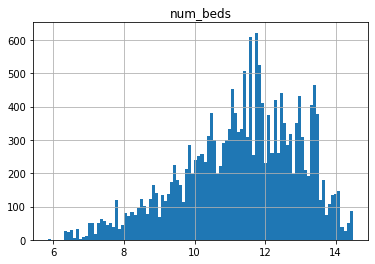

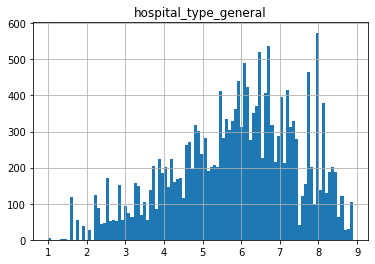

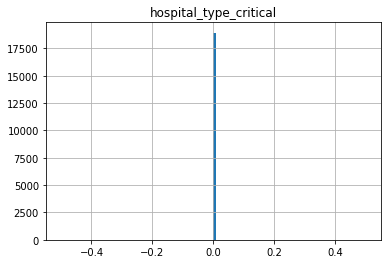

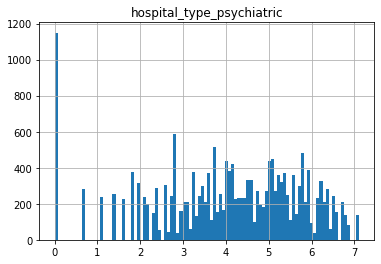

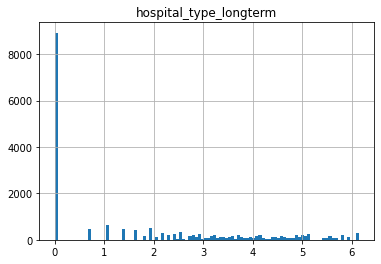

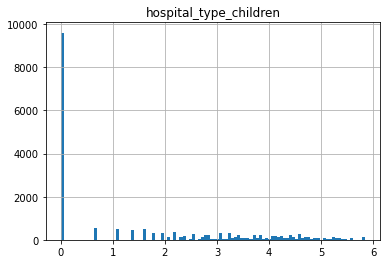

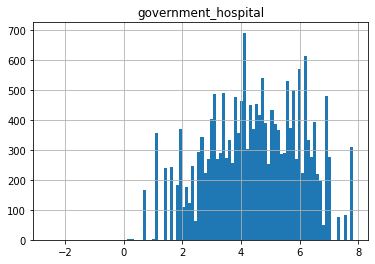

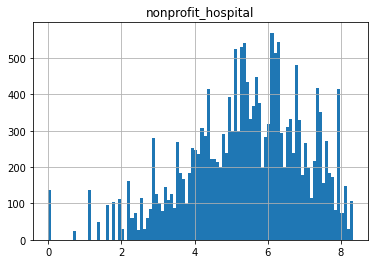

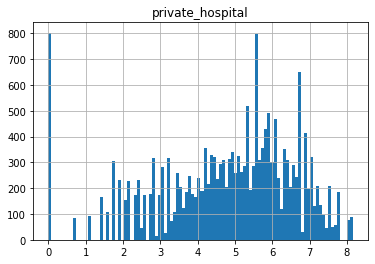

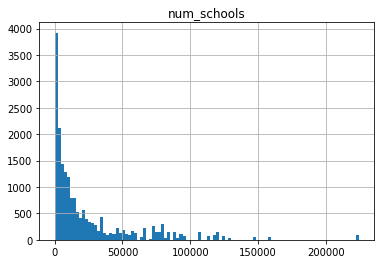

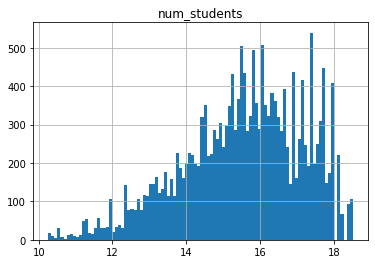

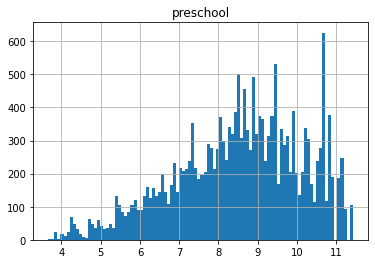

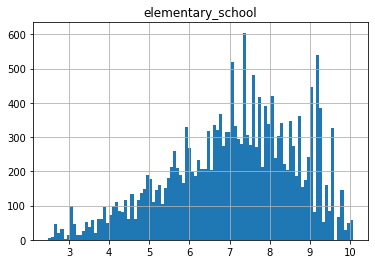

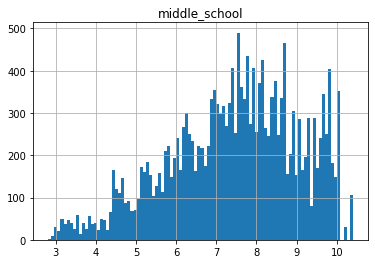

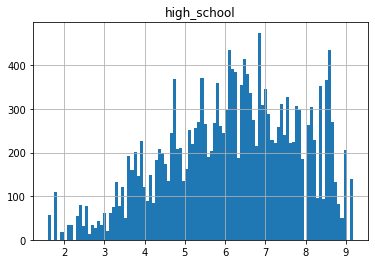

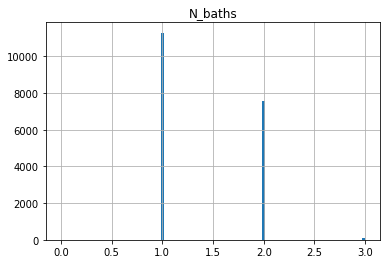

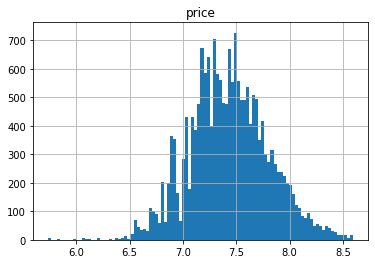

In [25]:
hist(df_train, bins=100)

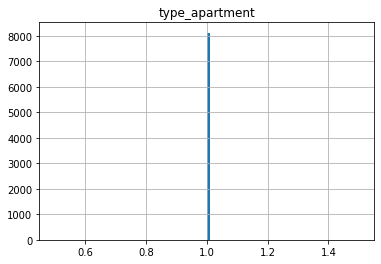

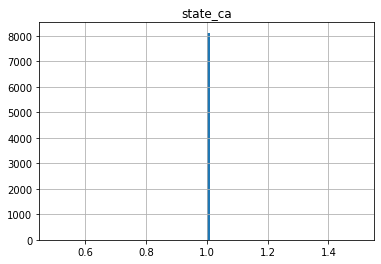

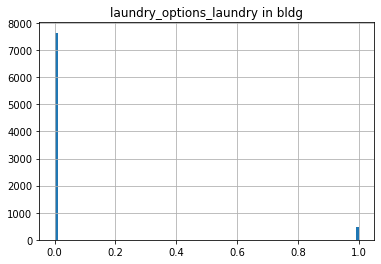

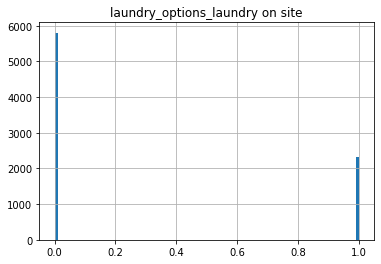

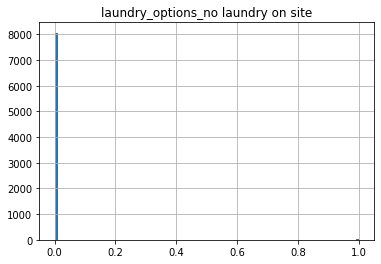

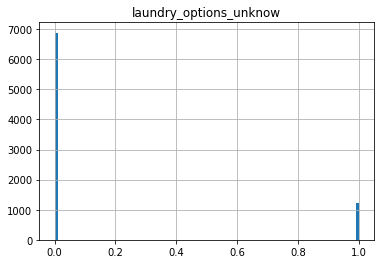

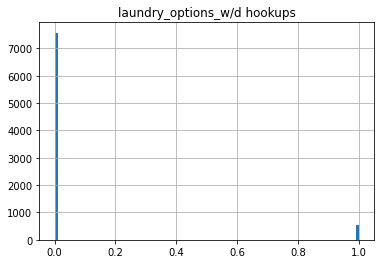

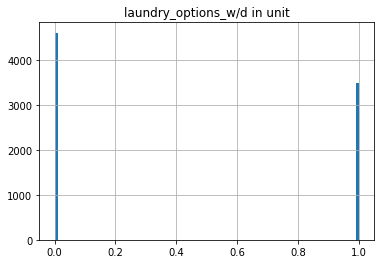

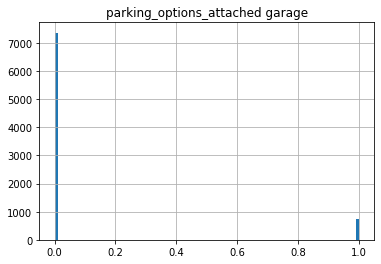

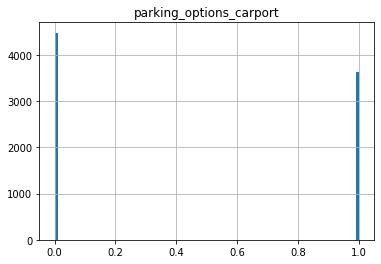

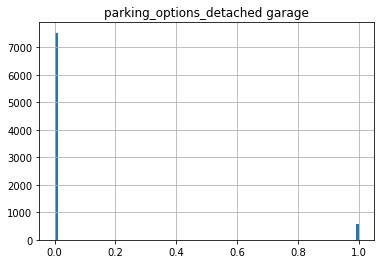

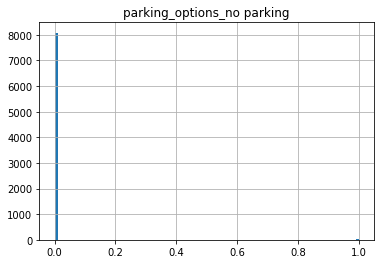

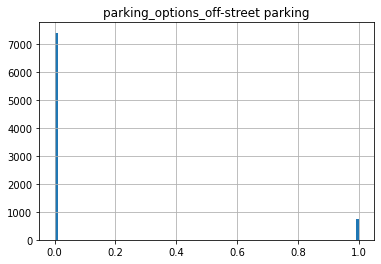

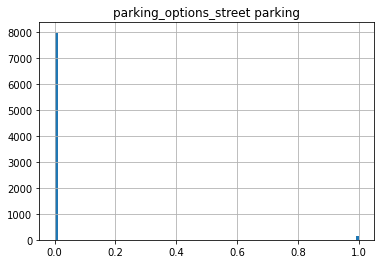

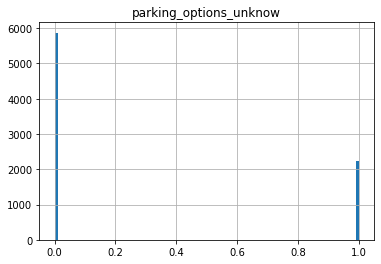

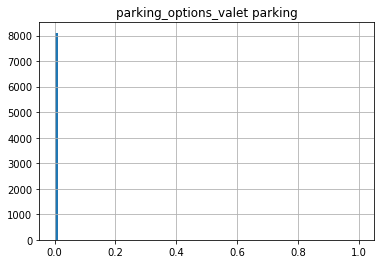

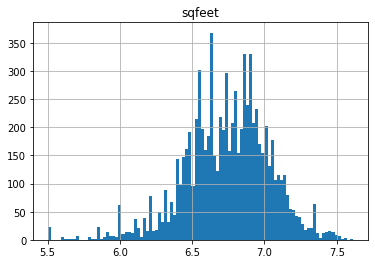

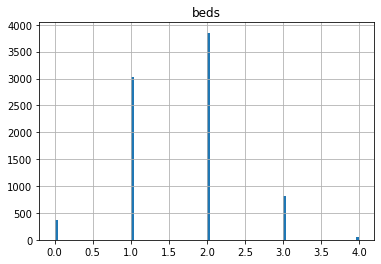

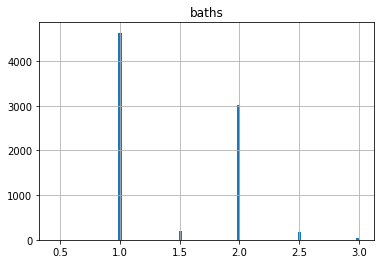

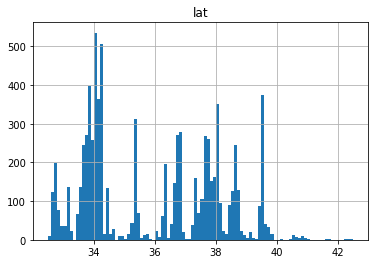

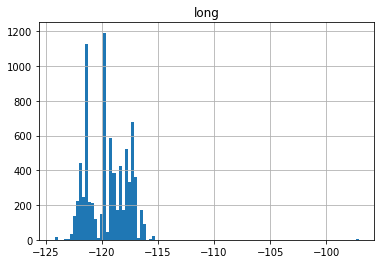

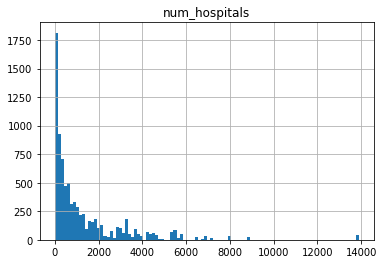

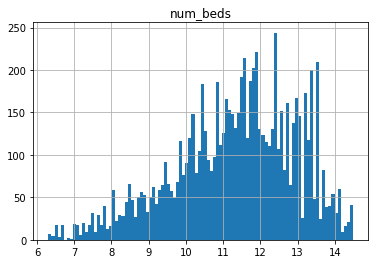

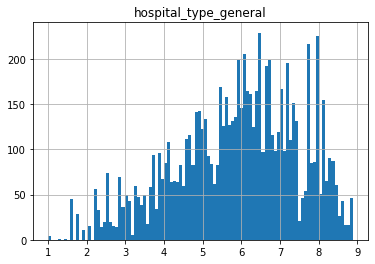

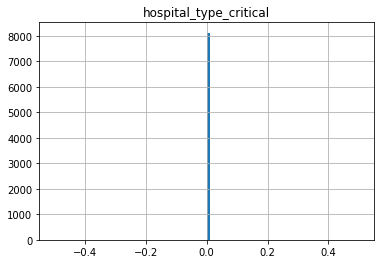

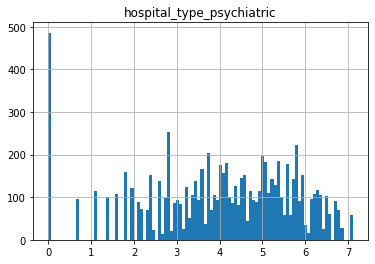

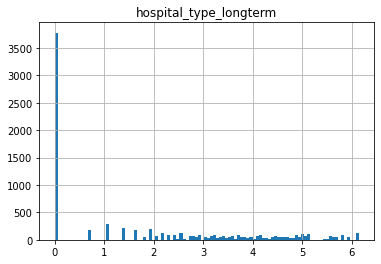

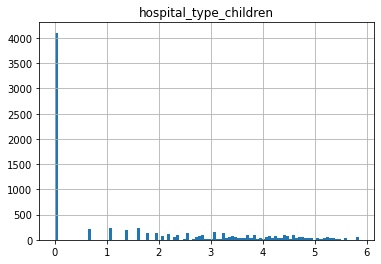

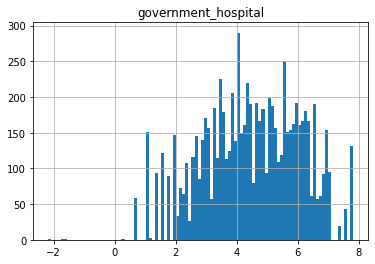

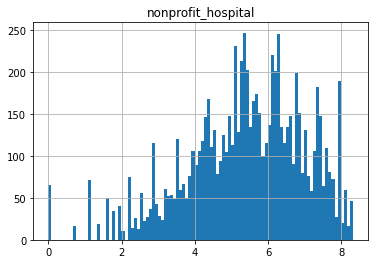

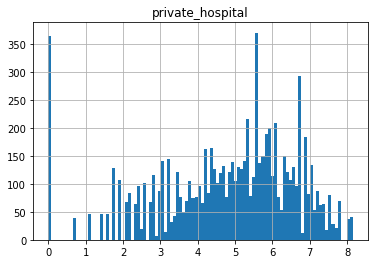

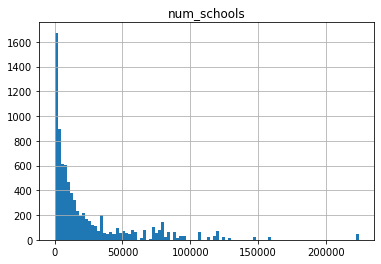

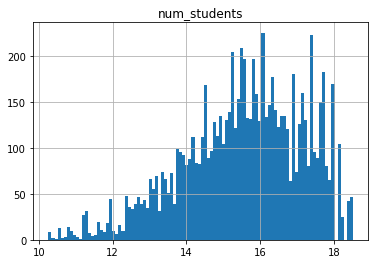

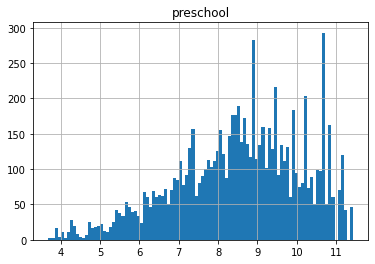

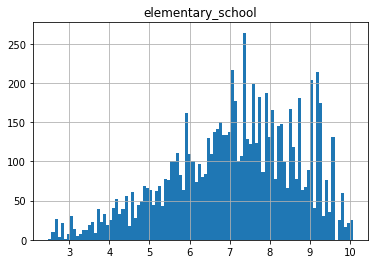

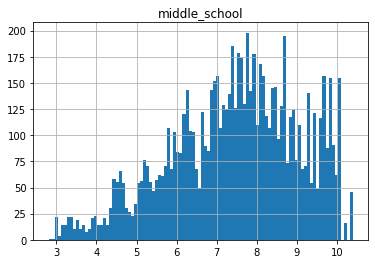

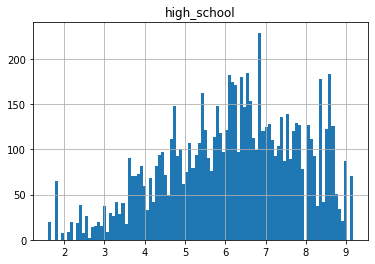

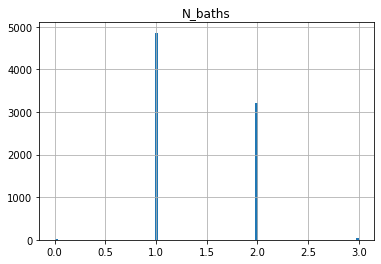

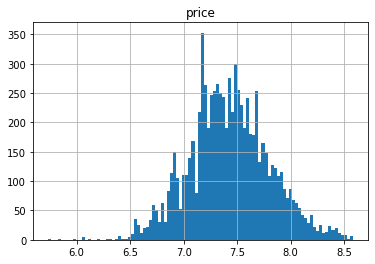

In [27]:
hist(df_test, bins=100)

In [30]:
barplot(df_train,top=5,freq=True)

Text(0.5, 1.0, 'Histogram of price')

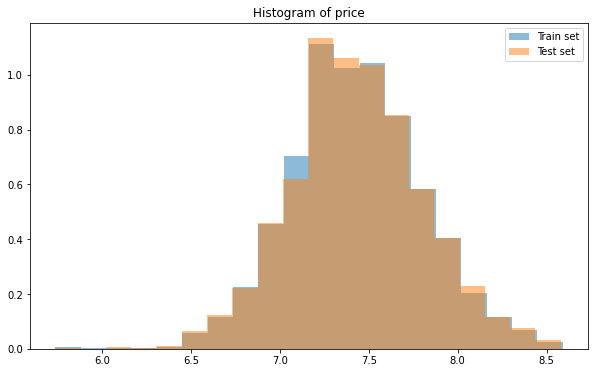

In [31]:
plt.figure(figsize=(10,6))
plt.hist(df_train.price, density=True, alpha=0.5, bins = 20, label = "Train set")
plt.hist(df_test.price, density=True, alpha=0.5, bins = 20, label="Test set")
plt.legend()
plt.title("Histogram of price")


Text(0.5, 1.0, 'Histogram of latitude')

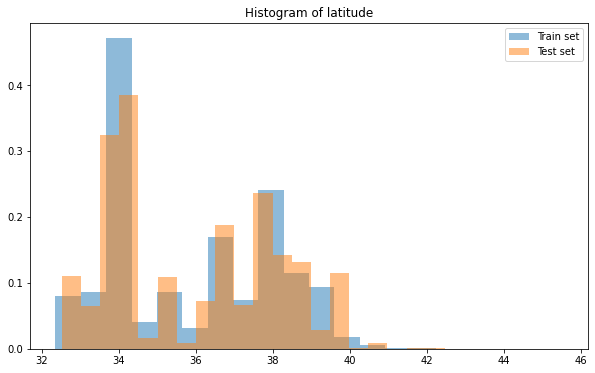

In [33]:
plt.figure(figsize=(10,6))
plt.hist(df_train.lat, density=True, alpha=0.5, bins = 20, label = "Train set")
plt.hist(df_test.lat, density=True, alpha=0.5, bins = 20, label="Test set")
plt.legend()
plt.title("Histogram of latitude")

Text(0.5, 1.0, 'Histogram of longitude')

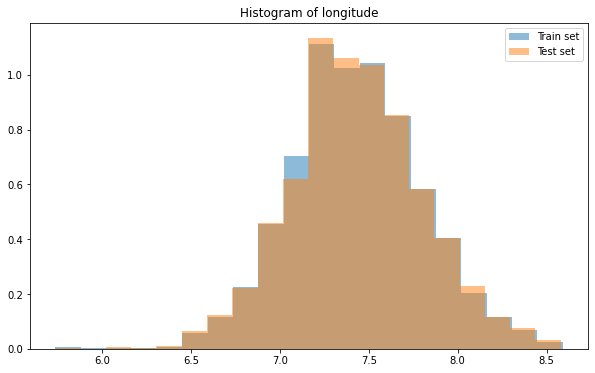

In [36]:
plt.figure(figsize=(10,6))
plt.hist(df_train.price, density=True, alpha=0.5, bins = 20, label = "Train set")
plt.hist(df_test.price, density=True, alpha=0.5, bins = 20, label="Test set")
plt.legend()
plt.title("Histogram of longitude")